In [29]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
import math
display.set_matplotlib_formats('svg')

/var/folders/4x/pds2gxg17h57rrp30d736s1w0000gn/T/ipykernel_47214/34244193.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
def NNmodel(y,x):
    # build model
    ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
    # learning rate
    learningRate = .05
    # loss function
    lossfun = nn.MSELoss()
    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
    # train the model
    numepochs = 500
    losses = torch.zeros(numepochs)
    
    ## Train the model!
    for epochi in range(numepochs):
        # forward pass
        yHat = ANNreg(x)
        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss
        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # show the losses
    # manually compute losses
    # final forward pass
    predictions = ANNreg(x)
    testloss = (predictions-y).pow(2).mean()
    return (testloss.item(),np.round(np.corrcoef(y.T,predictions.detach().T)[0,1],2))

In [4]:
def createData(m):
    # create data
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2
    return (y,x)

In [31]:
slope,losses,coeffs = [],[],[]
for m in np.arange(-2.0,2.2,0.2):
    mean_loss = mean_corrCoeff = 0
    for _ in range(50):
        y,x = createData(m)
        loss,corrCoeff = NNmodel(y,x)
        mean_loss+=loss
        if not math.isnan(corrCoeff):
            mean_corrCoeff+=corrCoeff
    mean_loss/=50
    mean_corrCoeff/=50
    slope.append(m)
    losses.append(mean_loss)
    coeffs.append(mean_corrCoeff)    

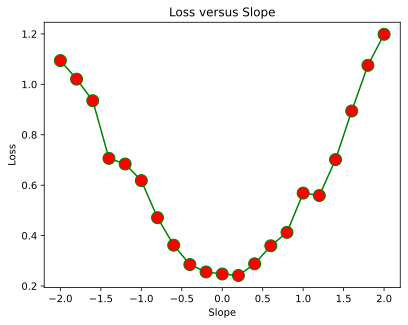

In [36]:
plt.plot(slope,losses,color = 'green',
         linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 12)
plt.xlabel('Slope')
plt.ylabel('Loss')
plt.title('Loss versus Slope')
plt.show()

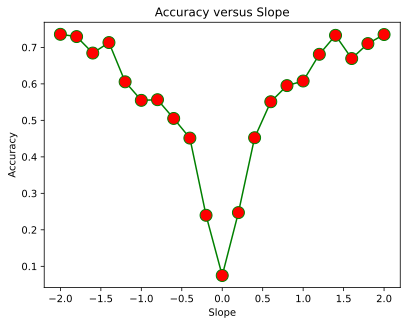

In [35]:
plt.plot(slope,coeffs,color = 'green',
         linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 12)
plt.xlabel('Slope')
plt.ylabel('Accuracy')
plt.title('Accuracy versus Slope')
plt.show()